# Venn diagramm

In [ ]:
install.packages('VennDiagram')
library(VennDiagram)

In [ ]:
plot_Venn_diagramm <- function(a, b, name_a, name_b) {
    options(repr.plot.res = 100) # set a high-definition resolution for the jupyter notebooks plots (DPI)
    notebook_plot_size(2, 2)
    
    return (draw.pairwise.venn(
    length(a),
    length(b),
    sum(a %in% b),
    category = c(name_a, name_b),
    fill = c("blue", "red"),
    alpha = c(0.5, 0.5),
    cat.pos = c(0, 0),
    scaled = TRUE))
}

plot_Venn_diagramm(oncokb_genes, candl_genes, "oncokb", "candl")

In [ ]:
notebook_plot_size(6, 6)
draw.triple.venn(
length(oncokb_genes),
length(cgi_genes),
length(civic_genes),
sum(oncokb_genes %in% cgi_genes),
sum(cgi_genes %in% civic_genes),
sum(civic_genes %in% oncokb_genes),
sum(cgi_genes %in% oncokb_genes & cgi_genes %in% civic_genes),
category = c("oncokb", "cgi", "civic"),
lty = rep("blank", 3),
fill = c("light blue", "pink", "green"),
alpha = rep(0.5, 3),
cat.pos = rep(0, 3),
cat.dist = rep(0.025, 3),
scaled = TRUE)

# ggballoonplot

In [ ]:
install.packages("ggpubr")
library(ggpubr)
theme_set(theme_pubr())

impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

ggballoonplot(as.data.frame(table(impact$Hugo_Symbol,
                                  impact$Variant_Type)),
              fill = "value") + scale_fill_viridis_c(option = "C")

In [ ]:
# install.packages("ggpubr")
# library(ggpubr)
# theme_set(theme_pubr())

colnames = c("is_in_oncokb", "is_in_civic", "is_in_cgi", "is_in_candl")

r <- data.frame()

for (col in colnames) {
    r <- rbind(r, impact %>% filter(!! sym(col) == "yes") %>%
                summarise(colnames = substr(col, 7, nchar(col)),
                          oncokb = sum(is_in_oncokb == "yes"),
                          civic  = sum(is_in_civic == "yes"),
                          cgi    = sum(is_in_cgi == "yes"),
                          candl  = sum(is_in_candl == "yes")))
}
r
ggballoonplot(r[,c("oncokb", "civic", "cgi", "candl")], fill = "value") + scale_fill_viridis_c(option = "C")

In [22]:
source("../src/utils/custom_tools.R")
setup_environment("../src/utils")

In [3]:
impact <- read.table("../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
#impact <- add_features("../data/", impact, annotations = TRUE)

# mutation distances checker

In [ ]:
check_distance <- function(starts, ends, mut_key, result) {
    if (length(starts) <= 1)
        return (result)
    
    for (i in 2:length(starts)) {
        if (starts[[i]] <= starts[[1]] & ends[[i]] >= starts[[1]] | starts[[i]] >= starts[[1]] & starts[[i]] <= ends[[1]]) {
            r1 <- data.frame(paste(starts[[1]], ends[[1]], sep = '_'), mut_key[[1]])
            r2 <- data.frame(paste(starts[[i]], ends[[i]], sep = '_'), mut_key[[i]])
            colnames(r1) <- c("v1", "v2")
            colnames(r2) <- c("v1", "v2")
            
            
            result <- rbind(result, r1)
            result <- rbind(result, r2)
            
            starts <- starts[-1]
            starts <- starts[-i]
            
            ends <- ends[-1]
            ends <- ends[-i]
            
            mut_key <- mut_key[-1]
            mut_key <- mut_key[-i]
            
            break
        }
    }
    
    if (length(starts) <= 1)
        return (result)
    
    return (check_distance(starts[2:length(starts)], ends[2:length(starts)], mut_key[2:length(starts)], result))
}

get_pos <- function(result) {
    if (nrow(result) == 0)
        return ("")
    else
        return (toString(result$v1))
}

get_mut <- function(result) {
    if (nrow(result) == 0)
        return ("")
    else
        return (toString(result$v2))
}




dd2 <- dd %>% group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% summarise(count = n(),
                                                                       pos = get_pos(check_distance(Start_Position, End_Position, mut_key, data.frame())),
                                                                       mut_key = get_mut(check_distance(Start_Position, End_Position, mut_key, data.frame()))) %>%
                                                             filter(pos != "")
nrow(dd2)
head(dd2, 10)

# Test cbioportal

In [32]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


```shell
$ curl "http://www.cbioportal.org/webservice.do?cmd=getClinicalData&case_set_id=msk_impact_2017_all" --output cbioportal.txt```

In [21]:
cbioportal <- read.table("../../../data/other_databases/cbioportal.txt",
                         sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [22]:
head(cbioportal)

CASE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,DNA_INPUT,MATCHED_STATUS,METASTATIC_SITE,ONCOTREE_CODE,OS_MONTHS,OS_STATUS,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SEX,SMOKING_HISTORY,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TUMOR_PURITY,VITAL_STATUS
P-0005947-T01-IM5,Bladder Cancer,Upper Tract Urothelial Carcinoma,250,Matched,,UTUC,19.00,LIVING,Upper Tract,Tumor,In-House,648,Primary,Female,Unknown,DNA,Resection,80,ALIVE
P-0009180-T01-IM5,Melanoma,Cutaneous Melanoma,250,Matched,"Lymph Node, Regional",SKCM,NA,DECEASED,Skin,Tumor,In-House,750,Metastasis,Female,Never,FFPE,Resection,10,DECEASED
P-0008840-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,Matched,Lymph Node,LUAD,1.78,LIVING,Lung,Tumor,In-House,978,Metastasis,Female,Prev/Curr Smoker,FFPE,Resection,30,ALIVE
P-0009304-T01-IM5,Glioma,Glioblastoma Multiforme,250,Matched,,GBM,1.22,LIVING,Brain,Tumor,Outside,1124,Primary,Female,Unknown,FFPE,Biopsy,50,ALIVE
P-0002010-T02-IM5,Ovarian Cancer,Clear Cell Ovarian Cancer,250,Matched,Liver,CCOV,6.28,DECEASED,Ovary,Tumor,In-House,862,Metastasis,Female,Never,FFPE,Resection,70,DECEASED
P-0004434-T01-IM5,Breast Cancer,Breast Invasive Lobular Carcinoma,250,Matched,Ipsilateral Breast,ILC,17.85,LIVING,Breast,Tumor,Outside,718,Metastasis,Female,Prev/Curr Smoker,DNA,Biopsy,50,ALIVE


In [35]:
get_table(unique(impact$Tumor_Sample_Barcode) %in% keys$Tumor_Sample_Barcode)
get_table(unique(impact$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

unmatched_keys <- impact[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode,]
unmatched_cbio <- impact[! impact$Tumor_Sample_Barcode %in% cbioportal$CASE_ID,]

get_table(unique(unmatched_keys$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

values,count,freq
TRUE,20040,87.2%
FALSE,2950,12.8%
-- total --,22990,100%


values,count,freq
FALSE,16283,70.8%
TRUE,6707,29.2%
-- total --,22990,100%


values,count,freq
FALSE,2064,70%
TRUE,886,30%
-- total --,2950,100%


# Rename `Hugo_Symbol` in the final dataset

### [Modify] wrong or synonymous `Hugo_Symbol`

Unfortunately there are some wrong/synonymous `Hugo_Symbol`. We use the [symbol checker tool](https://www.genenames.org/cgi-bin/symbol_checker) of the website HGNC (HUGO Gene Nomenclature Committee) to correct the errors, we give the result of `unique(impact$Hugo_Symbol)` to the symbol checker tool, and check which symbols are wrong/synonymous. Any incertitude was double ckecked with [OncoKB](http://oncokb.org/#/). Based on the results, the following 18 symbols were found to be unofficial:

| Old Hugo Symbol  | New Hugo symbol | HGNC reason     |
| ---------------- | --------------- | --------------- |
| MLL3             | KMT2C           | Previous symbol |
| PAK7             | PAK5            | Previous symbol |
| RFWD2            | COP1            | Previous symbol |
| MYCL1            | MYCL            | Previous symbol |
| MLL2             | KMT2D           | Previous symbol |
| MLL              | KMT2A           | Previous symbol |
| FAM46C           | TENT5C          | Previous symbol |
| MRE11A           | MRE11           | Previous symbol |
| PARK2            | PRKN            | Previous symbol |
| FAM175A          | ABRAXAS1        | Previous symbol |
| TCEB1            | ELOC            | Previous symbol |
| WHSC1            | NSD2            | Previous symbol |
| WHSC1L1          | NSD3            | Previous symbol |
| FAM58A           | CCNQ            | Previous symbol |
| SETD8            | KMT5A           | Previous symbol |
| MLL4             | KMT2B           | Synonyms        |
| CDKN2Ap16INK4A   | CDKN2A          | Unmatched       |
| CDKN2Ap14ARF     | CDKN2Ap14ARF    | Unmatched       |
*The symbols `TCF3`, `TRAF2`and `ERF` are marked as "Previous symbol" and "Approved symbol" by HGNC, and are still considered official by OncoKB, so we kept them.

We decided to rename every symbols that are classified as "Previous Symbol" and "Synonyms" (see next header). The processus applied to rename `CDKN2Ap16INK4A` and `CDKN2Ap14ARF` is detailed just after (see second header).

#### Renaming the "Previous Symbol" and "Synonyms"

In [48]:
old_Hugo_Symbol = c('MLL3', 'PAK7', 'RFWD2', 'MYCL1', 'MLL2', 'MLL', 'FAM46C', 'MRE11A', 'PARK2', 'FAM175A',
                    'TCEB1', 'WHSC1', 'WHSC1L1', 'FAM58A', 'SETD8', 'MLL4')
new_Hugo_Symbol = c('KMT2C', 'PAK5', 'COP1', 'MYCL', 'KMT2D', 'KMT2A', 'TENT5C', 'MRE11', 'PRKN', 'ABRAXAS1',
                    'ELOC', 'NSD2', 'NSD3', 'CCNQ', 'KMT5A', 'KMT2B')

has_old_symbol <- which(impact$Hugo_Symbol %in% old_Hugo_Symbol)
length(impact$Hugo_Symbol[has_old_symbol]) # 5696 previous/synonyms symbols!

[1] 5696

In [49]:
dd <- head(unique(impact$Hugo_Symbol[has_old_symbol]), 10)
dd <- data.frame(dd, new_Hugo_Symbol[match(dd, old_Hugo_Symbol)], row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
MLL3,KMT2C
MYCL1,MYCL
MLL2,KMT2D
PAK7,PAK5
MLL,KMT2A
FAM46C,TENT5C
MRE11A,MRE11
PARK2,PRKN
FAM175A,ABRAXAS1
RFWD2,COP1


In [50]:
# [~5696 rows] modify wrong/synonymous Hugo_Symbol
impact$Hugo_Symbol[has_old_symbol] <- new_Hugo_Symbol[match(impact$Hugo_Symbol[has_old_symbol], old_Hugo_Symbol)]

#### Renaming`CDKN2Ap16INK4A` and `CDKN2Ap14ARF`

The symbole checker tool detected two symbols as "Unmatched", `CDKN2Ap16INK4A` and `CDKN2Ap14ARF`. These two symbols correspond to two different reading frame of the gene `CDKN2A`:
* `CDKN2Ap16INK4A` is the "classic" reading frame for `CDKN2A`, the one used by OncoKB (see [OncoKB CDKN2A](http://oncokb.org/#/gene/CDKN2A))  
   → RefSeq. NM_000077.4  
   → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 1, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_000077.4)  
   → [Wikipedia article p16](https://en.wikipedia.org/wiki/P16)
* `CDKN2Ap14ARF` is an Alternative Reading Frame (ARF, as said in its name) for `CDKN2A`, not used by OncoKB  
  → RefSeq. NM_058195.3  
  → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 4, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_058195)  
  → [Wikipedia article p14arf](https://en.wikipedia.org/wiki/P14arf)
  
We decided to replace every `CDKN2Ap16INK4A` by `CDKN2A`. We also decided to keep the name `CDKN2Ap14ARF` for the alternative reading frame, except when the mutation was already included, for this tumor sample, in the classic reading frame (in `CDKN2Ap16INK4A`), then we delete the mutation because it has already been read.

In [51]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap16INK4A",])

[1] 1270

In [52]:
# [~1270 rows] Hugo_Symbol = CDKN2Ap16INK4A -> CDKN2A
impact$Hugo_Symbol[impact$Hugo_Symbol == "CDKN2Ap16INK4A"] <- "CDKN2A"

In [53]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF",]) # mutations having the alternative reading data frame
dd <- impact %>% group_by(Tumor_Sample_Barcode) %>% summarise(has_both_reading_frame = sum(Hugo_Symbol == "CDKN2Ap14ARF") > 0 & sum(Hugo_Symbol == "CDKN2A") > 0) %>% filter(has_both_reading_frame)
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode,]) # mutations having the alternative reading data frame and the classic reading data frame for this tumor sample

[1] 758

[1] 713

We delete from `impact` the rows that are `CDKN2Ap14ARF` and have already been read in the classic reading frame:

In [54]:
# [-713 rows] Hugo_Symbol = CDKN2Ap14ARF and CDKN2A in the tumor sample
impact <- impact[! (impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode),]

# Old cross_validate and other ml stuffs

In [ ]:
from sklearn.model_selection import cross_validate

def print_train_test_metrics(metrics, fold_number):
    print("Fold #: [fit_time | score_time]\n",
          "  → accuracy: [test_accuracy | train_accuracy]\n",
          "  → ROC AUC : [test_roc_auc  | train_roc_auc]\n")
    
    for i in range(fold_number):
        print("Fold %d: [%.2fs | %.2fs]\n"    % (i, metrics['fit_time'][i], metrics['score_time'][i]) +
              "  → accuracy: [%.3f | %.3f]\n" % (metrics['test_accuracy'][i], metrics['train_accuracy'][i]) +
              "  → ROC AUC : [%.3f | %.3f]"   % (metrics['test_roc_auc'][i]  , metrics['train_roc_auc'][i]))
        
    print()

def run(model, X, y, cv_strategy, print_fold_metrics = False, plot_roc = False, ax = None):
    scoring_metrics = ['accuracy', 'roc_auc']
    
    metrics = cross_validate(model, X, y, cv = cv_strategy, scoring = scoring_metrics, return_train_score = True)
    
    if print_fold_metrics:
        print_train_test_metrics(metrics, cv_strategy.get_n_splits())
    
    # mean metrics and 95% confidence interval on the metrics estimate (= 1.96 x standard_deviation)
    print("## Accuracy: %0.2f ± %0.2f\n" % (np.mean(metrics['test_accuracy']),
                                                1.96 * np.std(metrics['test_accuracy'])) +
          "## ROC AUC : %0.2f ± %0.2f" % (np.mean(metrics['test_roc_auc']),
                                              1.96 * np.std(metrics['test_roc_auc'])))
    
    if plot_roc:
        run_roc(model, X, y, cv_strategy, ax)

# strongly inspired by http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
def run_roc(model, X, y, cv_strategy, ax):
    from scipy import interp
    from sklearn.metrics import roc_curve, auc
    
    mean_fpr = np.linspace(0, 1, 100) # [0, 0.01, 0.02, ..., 0.09]
    tprs = [] # True Positive Rate for each fold
    aucs = [] # ROC AUC for each fold
            
    i = 0
    for train_index, test_index in cv_strategy.split(X, y):
        model.fit(X.iloc[train_index], y.iloc[train_index])
        y_pred = model.predict_proba(X.iloc[test_index])
        # y_pred: 1st column = proba of 0 (y_pred[:, 0]), 2nd column = proba of 1 (y_pred[:, 1])
        
        # fpr: false positive rate
        # tpr: true positive rate
        fpr, tpr, thresholds = roc_curve(y.iloc[test_index], y_pred[:, 1])
                
        # because the length of fpr and tpr vary with the fold (size of thersholds  = nunique(y_pred[:, 1]) + 1), we can't just do
        # fprs.append(fpr) and tprs.append(tpr)
        tprs.append(interp(mean_fpr, fpr, tpr)) # linear interpolation to find the values for a 100 tpr
        tprs[-1][0] = 0.0 # threshold > 1 for the first point
        
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        ax.plot(fpr, tpr, linewidth = 0.7, alpha = 0.5,
                label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    ax.plot([0, 1], [0, 1], '--r', linewidth = 0.5, alpha = 0.8, label = 'random')
    
    ##############
    ## mean ROC ##
    ##############
    mean_tpr = np.mean(tprs, axis = 0)
    ax.plot(mean_fpr, mean_tpr, 'b', linewidth = 1,
            label = 'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (np.mean(aucs), 1.96 * np.std(aucs)))

    ##################
    ## mean ROC std ##
    ##################
    std_tprs = np.std(tprs, axis = 0)
    ax.fill_between(mean_fpr, mean_tpr - std_tprs, mean_tpr + std_tprs, color = 'blue', alpha = 0.2,
                     label='$\pm$ 1 std. dev.')

    
    #####################
    ## plot parameters ##
    #####################
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = "lower right", prop = {'size': 10})

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_parameters_search_recap(grid_search_model):
    print("Best parameters (see accuracy scores below): %s" % str(grid_search_model.best_params_))
    
    for mean, std, parameters in zip(grid_search_model.cv_results_['mean_test_score'],
                                     grid_search_model.cv_results_['std_test_score'],
                                     grid_search_model.cv_results_['params']):
        print("%0.2f ± %0.2f for %r" % (mean, 1.96 * std, parameters))


def run_grid_search(model, X, y, inner_cv_strategy, parameters_grid):
    grid_search_model = GridSearchCV(model, parameters_grid, cv = inner_cv_strategy, scoring = 'accuracy', return_train_score = True, refit = True)
    grid_search_model.fit(X, y)
    
    print_parameters_search_recap(grid_search_model)
    
    return (GridSearchCV(model, parameters_grid, cv = inner_cv_strategy, scoring = 'accuracy', return_train_score = True, refit = True))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: from sklearn.model_selection
         ^


In [9]:
from sklearn.model_selection import GridSearchCV

# inner cross validation on hyperparameters
inner_cv_strategy = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 1)

In [10]:
i = 0
for train_index, test_index in cv_strategy.split(X, y):
    print("Fold %d :\n" % i,
          "  → train_index (%5d elements) %s\n" % (len(train_index), str(train_index)),
          "  → test_index  (%5d elements) %s"   % (len(test_index), str(test_index)))
    i += 1

Fold 0 :
   → train_index (21759 elements) [22384  9014  2951 ... 12325  1992 23421]
   → test_index  ( 5440 elements) [25681   326  3615 ...  8464 16587 15818]
Fold 1 :
   → train_index (21759 elements) [ 8628 18579  1037 ... 20352  6647 17410]
   → test_index  ( 5440 elements) [20063 12561 14191 ...  4164   710 20468]
Fold 2 :
   → train_index (21759 elements) [ 1441 21283 25746 ... 17064 10776  1673]
   → test_index  ( 5440 elements) [ 7412 17231 19251 ... 23327 12897  1196]
Fold 3 :
   → train_index (21759 elements) [16914 18024 19701 ...  7224 10318 20742]
   → test_index  ( 5440 elements) [  480  6279 17232 ...  6841 17050  9946]
Fold 4 :
   → train_index (21759 elements) [  141  3724  7643 ...  9259 10806 12796]
   → test_index  ( 5440 elements) [23573 25413 16572 ... 21823  5713  2985]


In [ ]:
#import sys
#sys.path.append('/Users/pierreguilmin/anaconda3/envs/impact-annotator_env/lib/python3.6/site-packages')
#sys.path

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

model_DecisionTreeClassifier = DecisionTreeClassifier(random_state = 1)
run_model(model_DecisionTreeClassifier, X, y, cv_strategy)

model_DecisionTreeClassifier.fit(X, y)
dot_data = export_graphviz(model_DecisionTreeClassifier, out_file = None, max_depth = 3, feature_names = X.columns.tolist(), class_names = ['non-somatic', 'somatic'], label = 'root', filled = True, proportion = True, rounded = True, special_characters = True, precision = 2) 
graph = graphviz.Source(dot_data) 
graph

## Manual run_model

In [ ]:
def run_model(model, X, y, cv_strategy, grid_search = False):
    print('Run model')

    metrics = pd.DataFrame(index = range(cv_strategy.get_n_splits()),
                           columns = ['fit_time', 'score_time',
                                      'train_accuracy', 'test_accuracy',
                                      'train_roc_auc', 'test_roc_auc',
                                      'test_fpr', 'test_tpr',
                                      'gs_best_parameters', 'gs_cv_results'])
    metrics.index.name = 'fold_number'
    
    i = 0
    
    # for each fold
    for train_index, test_index in cv_strategy.split(X, y):
        print('  - fold %d/%d...' % (i + 1, cv_strategy.get_n_splits()), end = '')
        (X_train, X_test) = (X.iloc[train_index], X.iloc[test_index])
        (y_train, y_test) = (y.iloc[train_index], y.iloc[test_index])

        
        # Fit model
        start = time.time()
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_test_pred  = model.predict_proba(X_test) [:, 1]        
        metrics.iloc[i].fit_time = time.time() - start
        
        # Get scores
        start = time.time()
        
        # accuracy
        metrics.iloc[i].train_accuracy = np.mean(model.predict(X_train) == y_train)
        metrics.iloc[i].test_accuracy  = np.mean(model.predict(X_test)  == y_test)

        # auc
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred) # fpr: false positive rate, tpr: true positive rate
        metrics.iloc[i].train_roc_auc = auc(fpr, tpr)

        fpr, tpr, thresholds = roc_curve(y_test , y_test_pred)
        metrics.iloc[i].test_roc_auc = auc(fpr, tpr)
        metrics.iloc[i].test_fpr = fpr
        metrics.iloc[i].test_tpr = tpr
    
        if grid_search:
            metrics.iloc[i].gs_best_parameters = model.best_params_
            metrics.iloc[i].gs_cv_results = model.cv_results_

        metrics.iloc[i].score_time = time.time() - start

        print(' done! (%.2fs)' % (metrics.iloc[i].fit_time + metrics.iloc[i].score_time))

        i += 1
        
    return metrics

# Old `Selene_Job.ipy`

In [ ]:
from custom_tools import *
from IPython import get_ipython
from subprocess import check_output
from subprocess import Popen, PIPE, STDOUT

class Selene_Job:
    def __init__(self, job_id):
        self.job_id = job_id
        self.local_job_directory_path = 'ssh_remote_jobs/job_' + str(job_id)
        self.selene_ssh_remote_jobs_path = 'guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs'
        self.selene_job_directory_path = self.selene_ssh_remote_jobs_path + '/job_' + str(job_id)
        
        self.make_local_job_directory_()
        

    def make_local_job_directory_(self):
        print('➞ mkdir ' + self.local_job_directory_path)

        #p = Popen('mkdir ' + self.local_job_directory_path, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('mkdir ' + self.local_job_directory_path, shell = True)
        #get_ipython().run_line_magic('mkdir', '{self.local_job_directory_path}')
        ! mkdir {self.local_job_directory_path}
    

    def run(self):
        print('➞ scp ' + self.local_job_directory_path + ' to ' + self.selene_ssh_remote_jobs_path)
        
        #p = Popen('scp -r ' +  self.local_job_directory_path + ' ' + self.selene_ssh_remote_jobs_path, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('scp -r ' +  self.local_job_directory_path + ' ' + self.selene_ssh_remote_jobs_path, shell = True)
        #get_ipython().run_line_magic('system', 'scp -r {self.local_job_directory_path} {self.selene_ssh_remote_jobs_path}')
        ! scp -r {self.local_job_directory_path} {self.selene_ssh_remote_jobs_path}

        test = 'echo "➞ Logged in $PWD on $HOSTNAME"; \
                \
                echo "➞ Load ~/.bash_profile"; \
                source ~/.bash_profile; \
                export LSF_ENVDIR=/common/lsf/conf; export LSF_SERVERDIR=/common/lsf/9.1/linux2.6-glibc2.3-x86_64/etc; \
                \
                echo "➞ Work on impact-annotator_env python virtualenv"; \
                workon impact-annotator_env; \
                \
                cd ~/impact-annotator/analysis/prediction/ssh_remote_jobs/job_' + str(self.job_id) + '; \
                echo "➞ Launch job in $PWD"; \
                bsub -o job_output.txt -We 20 "python script.py"'

        #p = Popen('ssh guilminp@selene.mskcc.org ' + test, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('ssh guilminp@selene.mskcc.org ' + test, shell = True)
        #get_ipython().run_line_magic('system', 'ssh guilminp@selene.mskcc.org \'{test}\'')
        !ssh guilminp@selene.mskcc.org '{test}'

    def get_results(self):        
        test = 'cd ~/impact-annotator/analysis/prediction/ssh_remote_jobs/job_' + str(self.job_id) + '; \
               [ -e metrics.pkl ] && echo "yes" || echo "no"'
            
        #file_found = get_ipython().run_line_magic('ssh', 'guilminp@selene.mskcc.org \'{test}\'')
        file_found = ! ssh guilminp@selene.mskcc.org '{test}'
        file_found = file_found[0]

        if file_found == "yes":
            print_md("✅ <span style='color:green'>Job \< " + str(self.job_id) + " \> finished !</span>\n")
            print('➞ scp ' + self.selene_job_directory_path + ' documents to ' + self.local_job_directory_path)
            #get_ipython().run_line_magic('scp', '-r {self.selene_job_directory_path}/metrics.pkl {self.local_job_directory_path}')
            ! scp -r {self.selene_job_directory_path}/metrics.pkl {self.local_job_directory_path}
            #get_ipython().run_line_magic('scp', '-r {self.selene_job_directory_path}/job_output.txt {self.local_job_directory_path}')
            ! scp -r {self.selene_job_directory_path}/job_output.txt {self.local_job_directory_path}

            print('➞ Load metrics.pkl in pandas dataframe')
            self.metrics = pd.read_pickle(self.local_job_directory_path + '/metrics.pkl')
            
            return(self.metrics)
        else:
            print_md("⚠️ <span style='color:red'>Job \< " + str(self.job_id) + " \> doesn't exist or is not done yet.</span>\n")

# Comparison between samplings

In [3]:
def get_negative_class(seed):
    positive_class_number = impact[impact.is_artefact].shape[0]
    return impact[~impact.is_artefact].iloc[seed * positive_class_number:(seed + 1) * positive_class_number]

In [4]:
impact = pd.read_csv('../../../data/annotated_final_IMPACT_mutations_180508.txt', sep='\t', low_memory=False)
impact['is_artefact'] = impact.confidence_class == "UNLIKELY"
    
sampling_1 = get_negative_class(0)
sampling_2 = get_negative_class(1)
sampling_3 = get_negative_class(2)

sampling_1['sampling'] = 'sampling_1'
sampling_2['sampling'] = 'sampling_2'
sampling_3['sampling'] = 'sampling_3'
data = pd.concat([sampling_1, sampling_2, sampling_3])

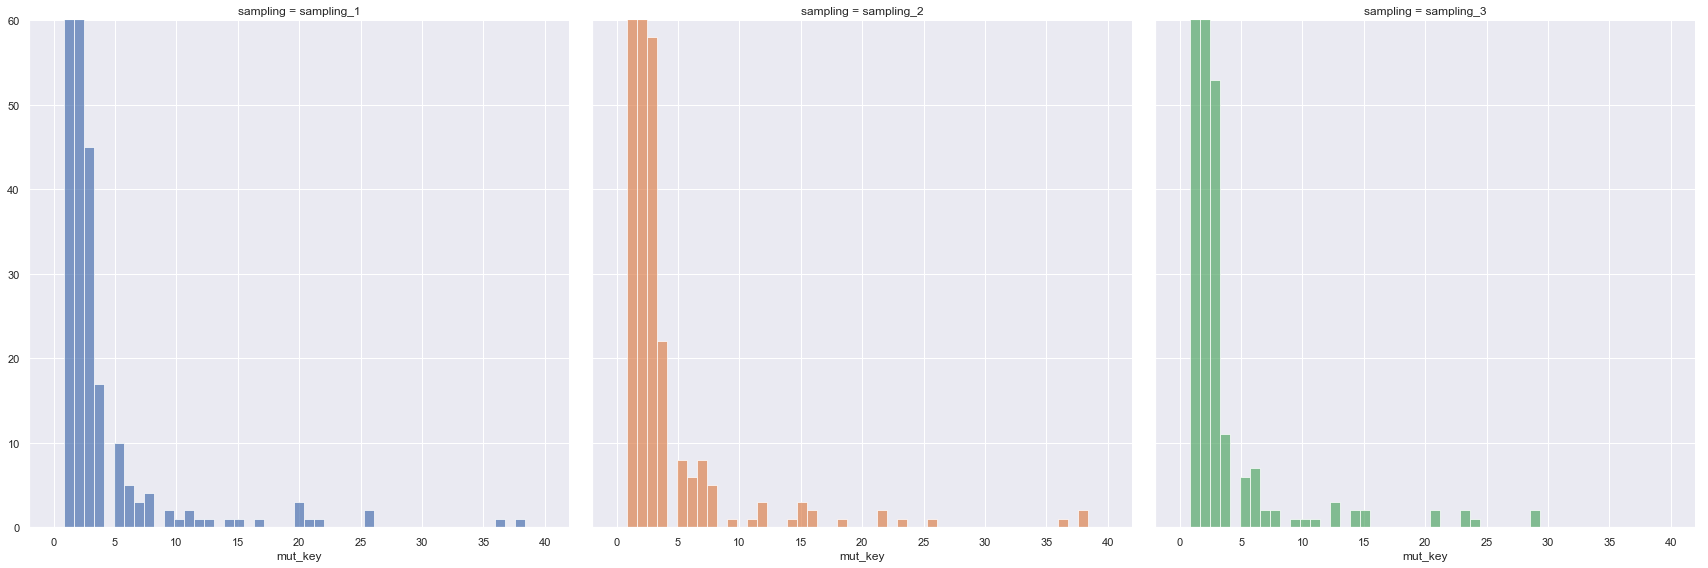

In [5]:
aggregation = {
    'mut_key': 'count',
    'sampling': lambda x: x.iloc[0]
}

grid = seaborn.FacetGrid(data.groupby(['sampling', 'mut_key']).aggregate(aggregation), col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'mut_key', bins=np.linspace(0, 40, 50), alpha=0.7)
plt.ylim(0, 60);

/Users/guilminp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


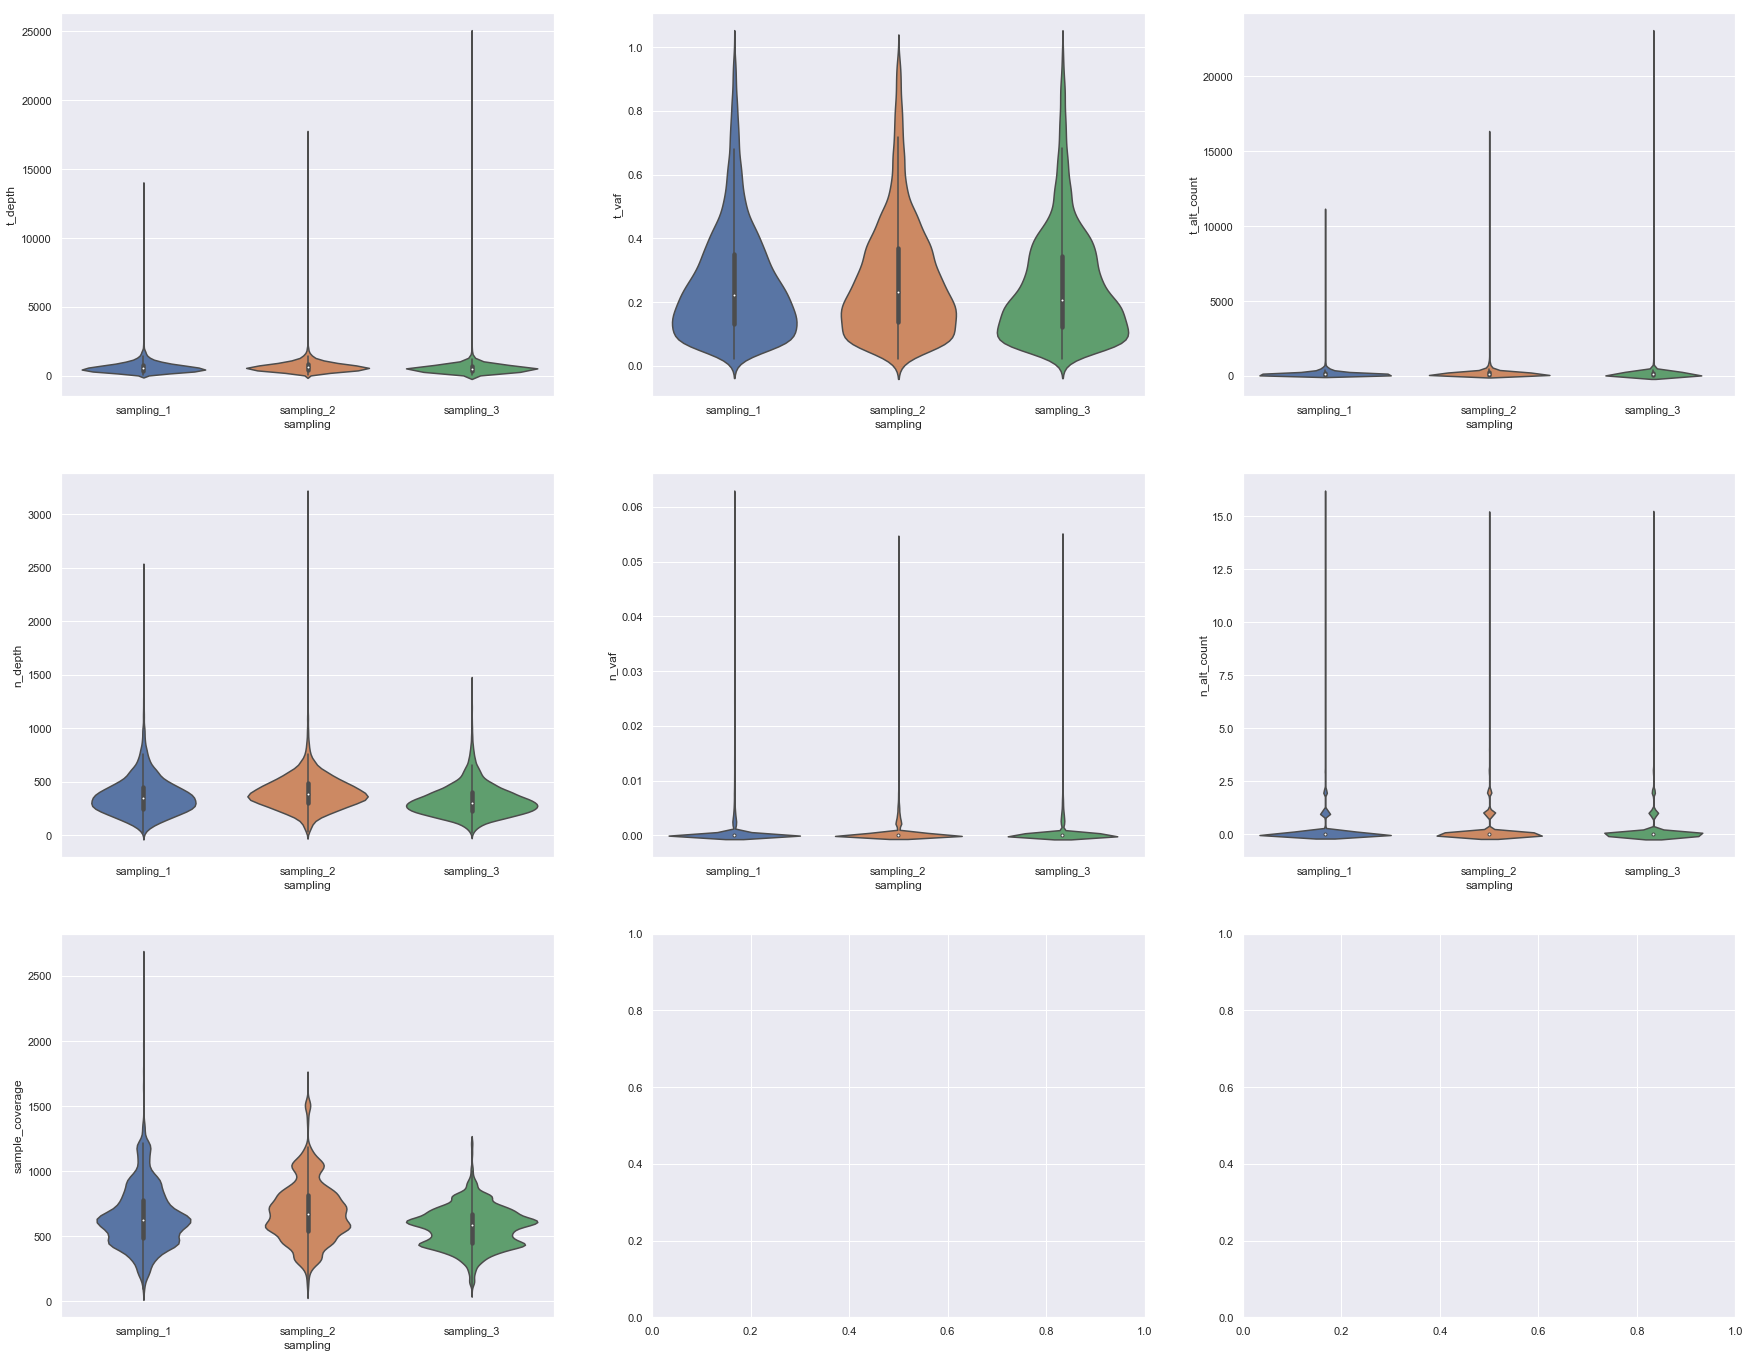

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(30, 24))

for i, feature in enumerate(['t_depth', 't_vaf', 't_alt_count',
                             'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage']):
    #seaborn.catplot(data=data, x='sampling', y=feature, kind='box', flierprops={'marker': 'o', 'markersize': 3}, ax=ax[i // 3, i % 3]);
    seaborn.catplot(data=data, x='sampling', y=feature, kind='violin', ax=ax[i // 3, i % 3])
    plt.close(2)

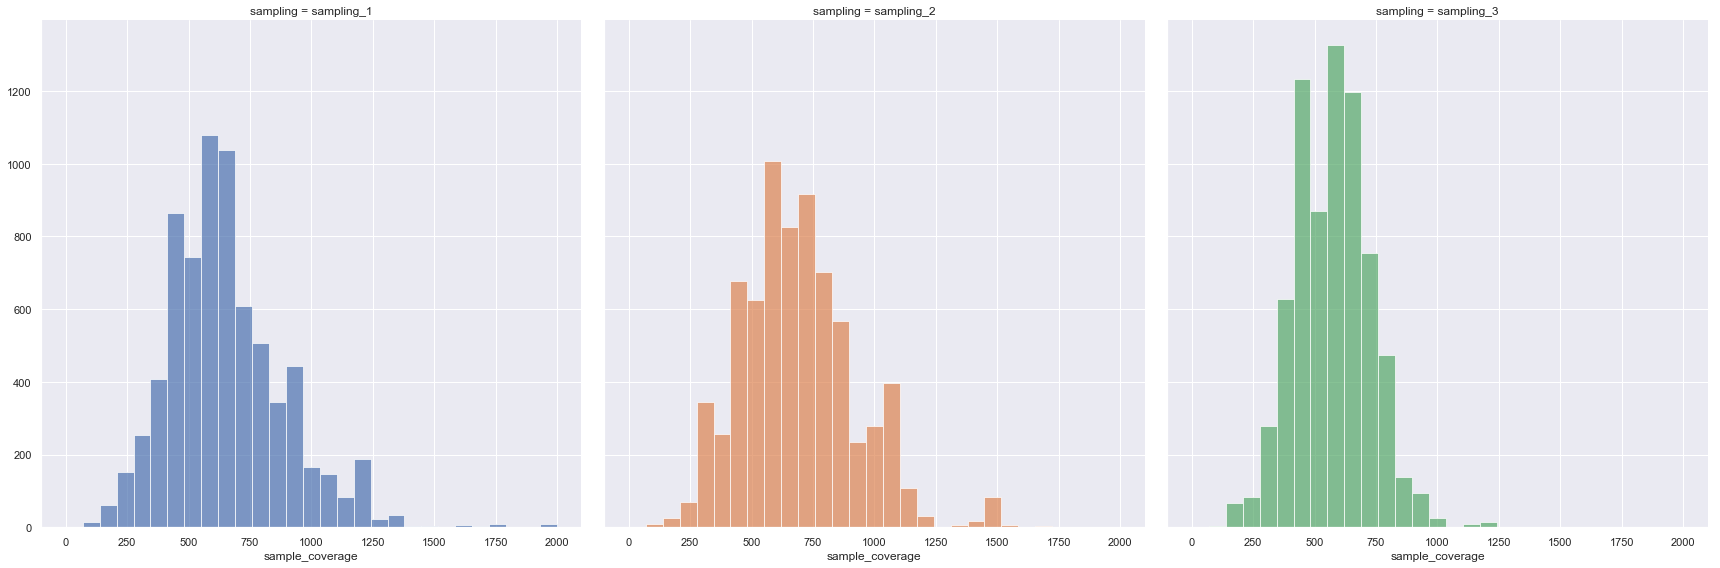

In [7]:
grid = seaborn.FacetGrid(data, col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'sample_coverage', bins=np.linspace(0, 2000, 30), alpha=0.7);

In [8]:
data[data.frequency_in_normals > 0]

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_COSMIC_CNT,VEP_gnomAD_AF,sample_mut_key,patient_key,frequency_in_normals,VEP_SIFT_class,VEP_SIFT_score,VEP_PolyPhen_class,VEP_PolyPhen_score,VEP_in_dbSNP,VEP_gnomAD_total_AF_AFR,VEP_gnomAD_total_AF_AMR,VEP_gnomAD_total_AF_ASJ,VEP_gnomAD_total_AF_EAS,VEP_gnomAD_total_AF_FIN,VEP_gnomAD_total_AF_NFE,VEP_gnomAD_total_AF_OTH,VEP_gnomAD_total_AF_max,VEP_gnomAD_total_AF,Kaviar_AF,is_a_hotspot,is_a_3d_hotspot,oncogenic,gene_type,is_artefact,sampling


/Users/guilminp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


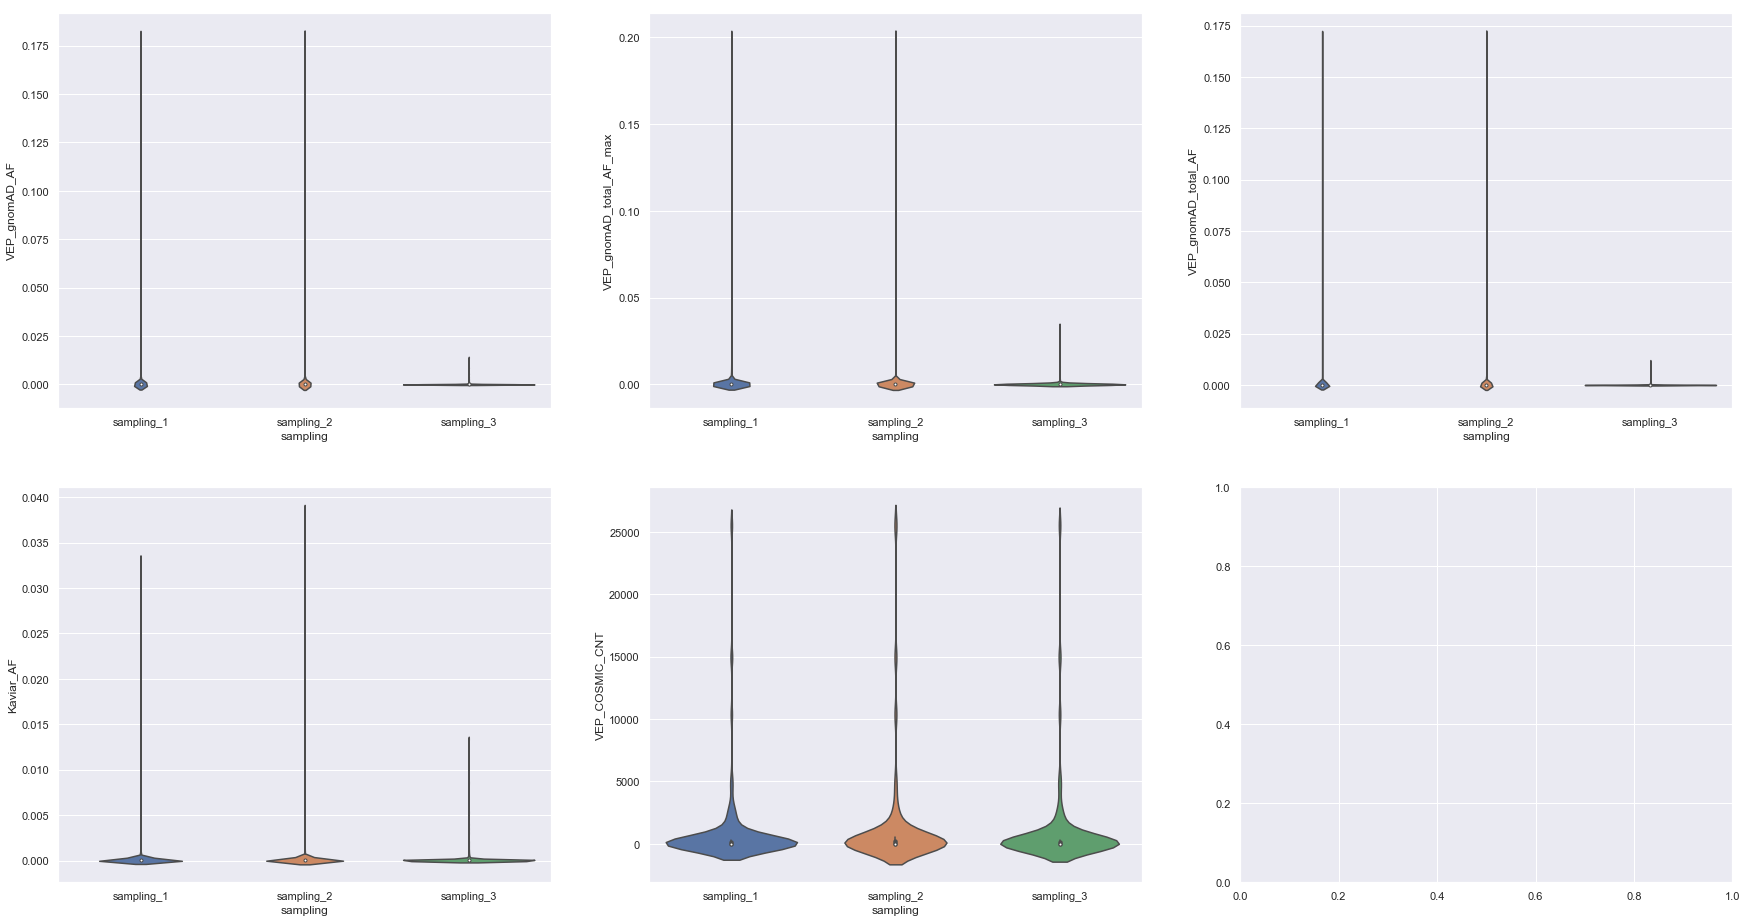

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(30, 16))
for i, feature in enumerate(['VEP_gnomAD_AF', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF',
                             'Kaviar_AF', 'VEP_COSMIC_CNT']):
    seaborn.catplot(data=data[data[feature] > 0], x='sampling', y=feature, kind='violin', ax=ax[i // 3, i % 3])
    plt.close(2)

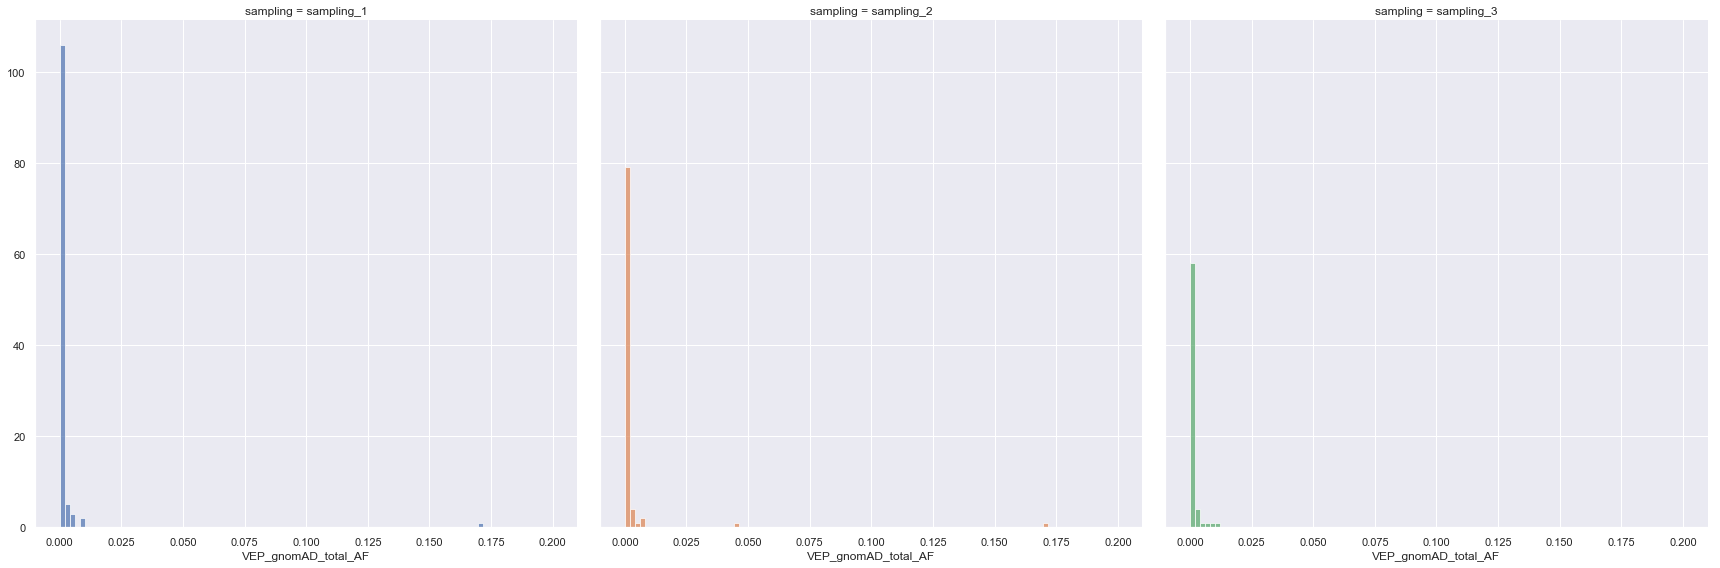

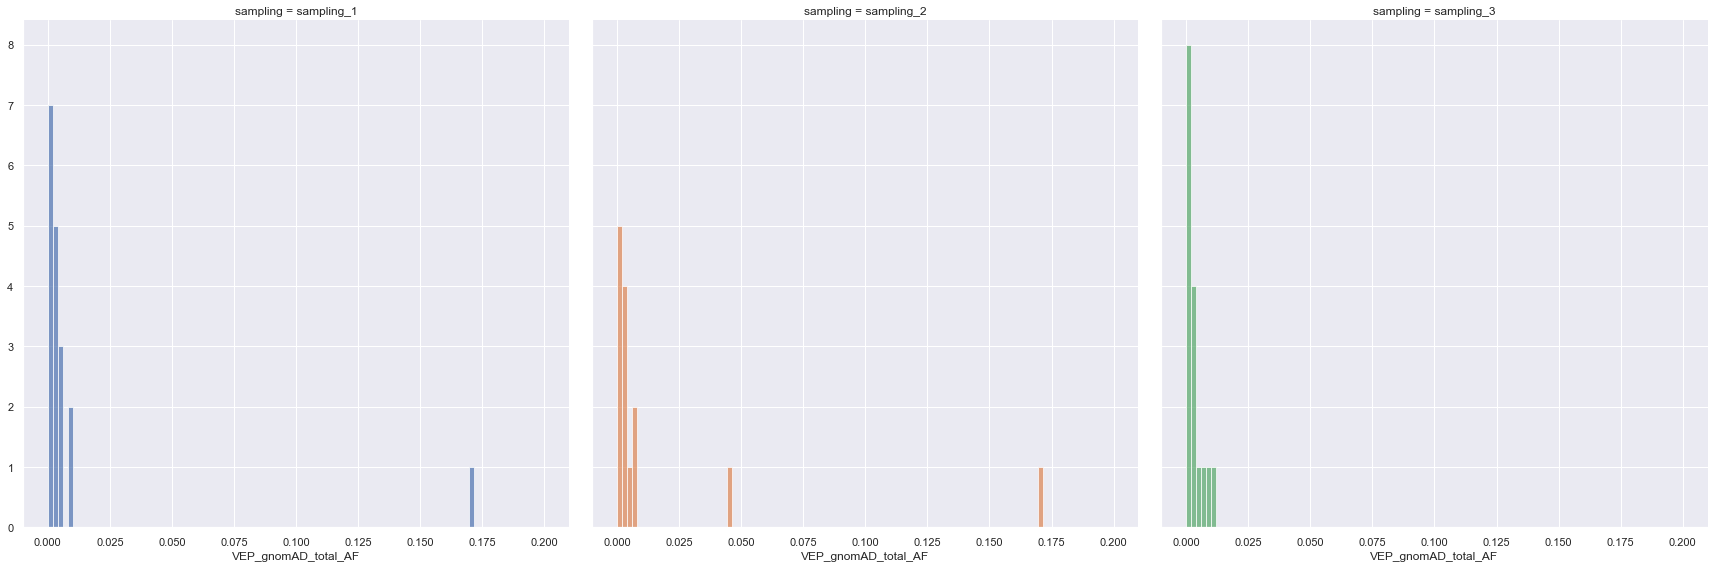

In [10]:
grid = seaborn.FacetGrid(data[data.VEP_gnomAD_total_AF > 0.0001], col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'VEP_gnomAD_total_AF', bins=np.linspace(0, 0.2, 100), alpha=0.7)
grid = seaborn.FacetGrid(data[data.VEP_gnomAD_total_AF > 0.001], col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'VEP_gnomAD_total_AF', bins=np.linspace(0, 0.2, 100), alpha=0.7);

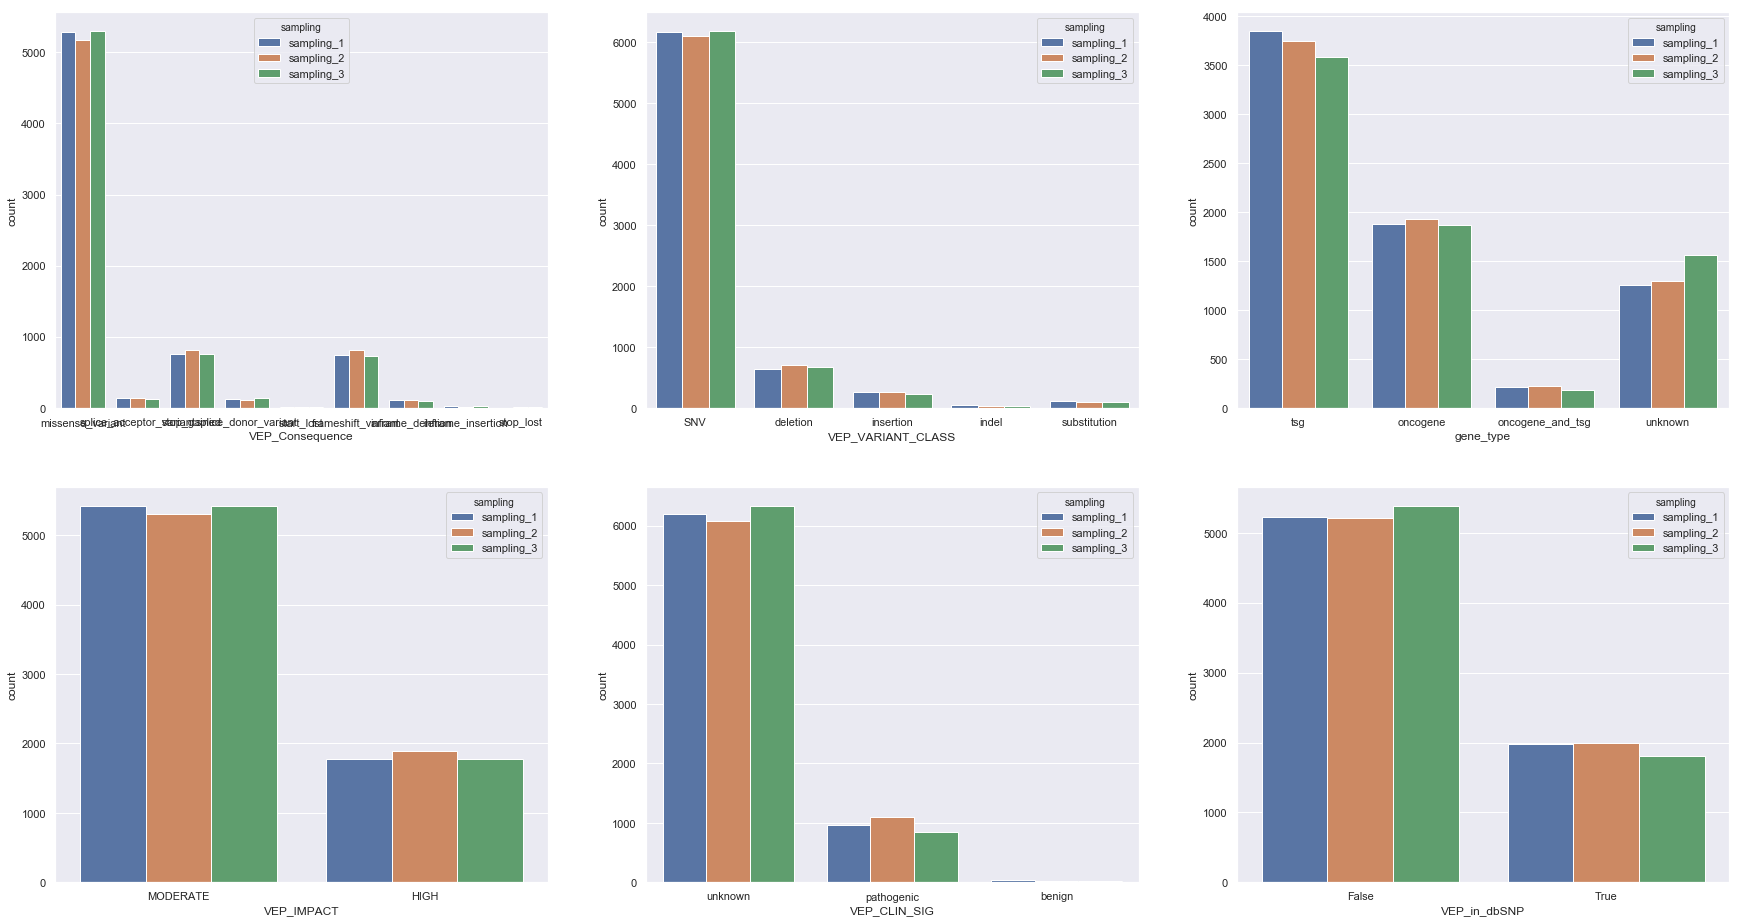

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(30, 16))
for i, feature in enumerate(['VEP_Consequence', 'VEP_VARIANT_CLASS', 'gene_type',
                             'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_in_dbSNP']):
    seaborn.catplot(data=data, hue='sampling', x=feature, kind='count', ax=ax[i // 3, i % 3])
    plt.close(2)